### Implementing simple Chatbot Using LangGraph

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

groq_api_key=os.getenv("GROQ_API_KEY")

In [2]:
from langchain_groq import ChatGroq
model=ChatGroq(model="openai/gpt-oss-120b",groq_api_key=groq_api_key)
model

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000023A320F2900>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000023A320F34D0>, model_name='openai/gpt-oss-120b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

# Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

### Nodes

In [5]:
def superbot(state: State) -> State:
    return {'messages': model.invoke(state['messages'])}

### Graph Construction

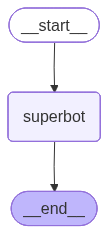

In [7]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

# Build Graph
graph = StateGraph(State)

# Adding Nodes
graph.add_node('superbot', superbot)

# Adding Edges
graph.add_edge(START, 'superbot')
graph.add_edge('superbot', END)

# Compile Graph
graph_built = graph.compile()

# View
display(Image(graph_built.get_graph().draw_mermaid_png(max_retries=5, retry_delay=2.0)))

### Graph Invocation

In [8]:
graph_built.invoke({'messages': 'Hi, My name is Shubham and I like Cricket.'})

{'messages': [HumanMessage(content='Hi, My name is Shubham and I like Cricket.', additional_kwargs={}, response_metadata={}, id='0dea6ee0-5fea-4385-97d2-90e2a9980a83'),
  AIMessage(content="Hello Shubham! Nice to meet you. 🎉\n\nCricket is such an exciting sport—do you have a favorite team or player? Are you more into watching the matches, playing yourself, or maybe both? I'd love to hear more about what you enjoy about cricket!", additional_kwargs={'reasoning_content': 'The user says "Hi, My name is Shubham and I like Cricket." Probably a greeting. We should respond politely, maybe ask about cricket preferences. No disallowed content. Just a friendly reply.'}, response_metadata={'token_usage': {'completion_tokens': 109, 'prompt_tokens': 84, 'total_tokens': 193, 'completion_time': 0.217289225, 'prompt_time': 0.003980586, 'queue_time': 0.050696764, 'total_time': 0.221269811}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_82669fd91d', 'service_tier': 'on_demand', 'finish_

### Streaming Response

In [ ]:
for event in graph_built.stream({'messages': 'Hi, My name is Shubham and I like Cricket.'}):
    print(event)

{'superbot': {'messages': AIMessage(content='Hello Shubham! 👋 Great to meet you.  \n\nCricket is such an exciting sport—do you have a favorite team or player? Are you more into watching matches, playing yourself, or maybe both? Let me know what you’d like to chat about!', additional_kwargs={'reasoning_content': 'The user says "Hi, My name is Shubham and I like Cricket." Probably wants a greeting and maybe ask something? The user just introduced themselves. The assistant should respond politely, greet, ask about cricket preferences, perhaps ask if they want to talk about cricket. Keep friendly.'}, response_metadata={'token_usage': {'completion_tokens': 123, 'prompt_tokens': 84, 'total_tokens': 207, 'completion_time': 0.245418299, 'prompt_time': 0.004417287, 'queue_time': 0.049654443, 'total_time': 0.249835586}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_82669fd91d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--e99315a3-252b-41d2-b